In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
import pandas as pd
from imutils import paths
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/New Train.zip'
!unzip '/content/gdrive/MyDrive/New Test.zip'

Archive:  /content/gdrive/MyDrive/New Train.zip
   creating: New Train/Normal/
  inflating: New Train/Normal/anastase-maragos-iUzgePOoGko-unsplash.jpg  
  inflating: New Train/Normal/download (1).jpg  
  inflating: New Train/Normal/download (10).jpg  
  inflating: New Train/Normal/download (11).jpg  
  inflating: New Train/Normal/download (12).jpg  
  inflating: New Train/Normal/download (13).jpg  
  inflating: New Train/Normal/download (14).jpg  
  inflating: New Train/Normal/download (15).jpg  
  inflating: New Train/Normal/download (16).jpg  
  inflating: New Train/Normal/download (17).jpg  
  inflating: New Train/Normal/download (2).jpg  
  inflating: New Train/Normal/download (3).jpg  
  inflating: New Train/Normal/download (4).jpg  
  inflating: New Train/Normal/download (5).jpg  
  inflating: New Train/Normal/download (6).jpg  
  inflating: New Train/Normal/download (7).jpg  
  inflating: New Train/Normal/download (8).jpg  
  inflating: New Train/Normal/download (9).jpg  
  infl

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/New Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/New Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1812 images belonging to 4 classes.
Found 161 images belonging to 4 classes.


In [ ]:
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.4))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  batch_size = 75
)

Epoch 1/10
57/57 [==============================] - 1300s 23s/step - loss: 5.9243 - accuracy: 0.4432 - val_loss: 2.5264 - val_accuracy: 0.2050
Epoch 2/10
57/57 [==============================] - 1283s 22s/step - loss: 1.1386 - accuracy: 0.5508 - val_loss: 2.3422 - val_accuracy: 0.2609
Epoch 3/10
44/57 [======================>.......] - ETA: 4:41 - loss: 1.0339 - accuracy: 0.5824

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "/content/Akebono-Taro-e1616586085402.jpg"

img = image.load_img( image_path , target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [ ]:
predict = model.predict([img])

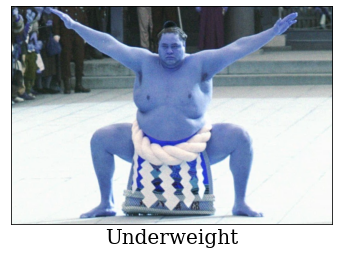

In [ ]:
img1 = cv2.imread("/content/Akebono-Taro-e1616586085402.jpg")
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'medium',
        'size': 20,
        }



if predict[0][0] == 1 :
    plt.xlabel("Underweight" , fontdict = font)

if predict[0][1] == 1 :
    plt.xlabel("Normal" , fontdict = font)
    
if predict[0][2] == 1 :
    plt.xlabel("Overweight" , fontdict = font)

if predict[0][3] == 1 :
    plt.xlabel("Obese" , fontdict = font)


plt.show()